In [3]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import __CDS__

data_fldr = "/l/mesur/aedinge/distortion_polarization/FB_distortion/"

posts_2016 = pd.read_csv(data_fldr + "240220_all_variants_2016.csv", index_col = "Unnamed: 0", lineterminator='\n')
posts_2020 = pd.read_csv(data_fldr + "240220_all_variants_2020.csv", index_col = "Unnamed: 0", lineterminator='\n')


In [20]:
cds_categories = [
    'Labeling and mislabeling',
    'Catastrophizing',
    'Dichotomous Reasoning',
    'Emotional Reasoning',
    'Disqualifying the Positive',
    'Magnification and Minimization',
    'Mental Filtering',
    'Mindreading',
    'Fortune-telling',
    'Overgeneralizing',
    'Personalizing',
    'Should statements',
]   

## Data Reformatting

In [62]:
users_16 = pd.DataFrame(posts_2016.groupby('user_id').count()['CDS']).rename({'CDS':'2016_total'}, axis=1)
users_16['2016_distortion'] = pd.DataFrame(posts_2016.groupby('user_id').sum()['CDS'])
users_16['2016_prevalence'] = users_16['2016_distortion']/users_16['2016_total']

users_20 = pd.DataFrame(posts_2020.groupby('user_id').count()['CDS']).rename({'CDS':'2020_total'}, axis=1)
users_20['2020_distortion'] = pd.DataFrame(posts_2020.groupby('user_id').sum()['CDS'])
users_20['2020_prevalence'] = users_20['2020_distortion']/users_20['2020_total']


In [45]:
long_users = set(users_20.index).intersection(set(users_16.index))

user_cts = pd.DataFrame(users_16.loc[list(long_users)]).merge(pd.DataFrame(users_20.loc[list(long_users)]), left_index=True, right_index=True)
user_cts['2016_prevalence'] = user_cts['2016_distortion']/user_cts['2016_total']
user_cts['2020_prevalence'] = user_cts['2020_distortion']/user_cts['2020_total']

user_cts

,2016_total,2016_distortion,2020_total,2020_distortion,2016_prevalence,2020_prevalence
user_id,,,,,,
526961900699651,52,11,271,104,0.211538,0.383764
309944675811335,12,4,230,40,0.333333,0.173913
93286195208,2,1,13,4,0.500000,0.307692
14073085963,2,0,2,1,0.000000,0.500000
33416011787,1,0,4,1,0.000000,0.250000
...,...,...,...,...,...,...
73756409831,3,0,168,42,0.000000,0.250000
174866249236469,5,4,5,4,0.800000,0.800000
197881290741,2,0,236,42,0.000000,0.177966


In [63]:
user_cts.to_csv(data_fldr + "240220_user_cts.csv")
users_16.to_csv(data_fldr + "240220_users_16.csv")
users_20.to_csv(data_fldr + "240220_users_20.csv")

## Data Analysis 

In [20]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

user_cts = pd.read_csv(data_fldr + "240220_user_cts.csv")
users_16 = pd.read_csv(data_fldr + "240220_users_16.csv")
users_20 = pd.read_csv(data_fldr + "240220_users_20.csv")

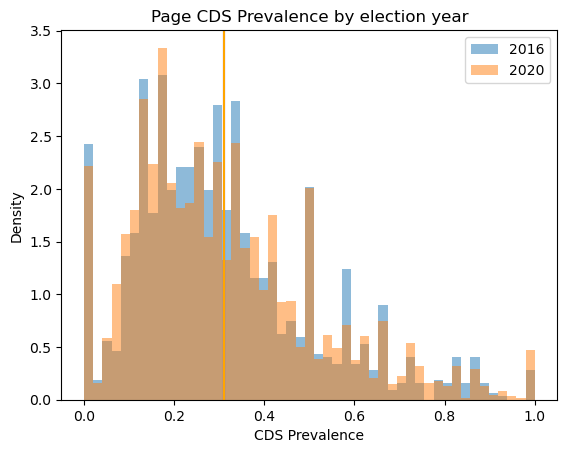

In [85]:
bins = np.linspace(0, 1, 50)

threshold = 5

# df1 = user_cts[(user_cts['2016_total'] > threshold) & (user_cts['2016_distortion']>1) & (user_cts['2020_total'] > threshold) & (user_cts['2020_distortion']>1)]
# df2 = df1

df1 = users_16[users_16['2016_total'] > threshold]
df2 = users_20[users_20['2020_total'] > threshold]

plt.hist(df1['2016_prevalence'], bins, density=True, alpha=0.5, label='2016')
plt.axvline(x=df1['2016_prevalence'].mean(), color='blue')

plt.hist(df2['2020_prevalence'], bins, density=True, alpha=0.5, label='2020')
plt.axvline(x=df2['2020_prevalence'].mean(), color='orange')

plt.title("Page CDS Prevalence by election year")
plt.ylabel("Density")
plt.xlabel("CDS Prevalence")
plt.legend(loc='upper right')
plt.show()

In [78]:
df2['2020_prevalence']

0       0.383764
14      0.250000
15      0.178571
19      0.139241
27      0.192000
          ...   
2647    0.176471
2655    0.260274
2663    0.142857
2674    0.330599
2684    0.488372
Name: 2020_prevalence, Length: 528, dtype: float64

mean:  1.066559408994158


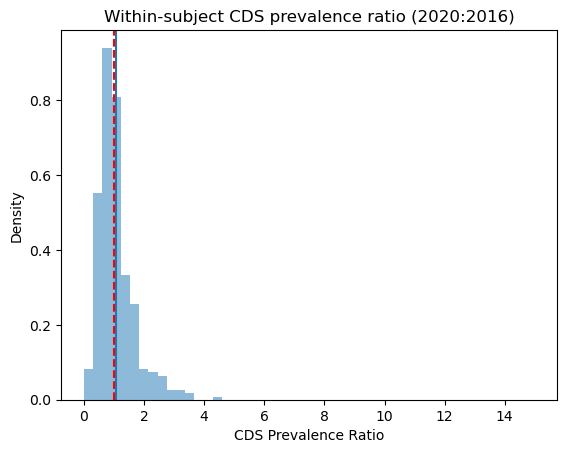

In [83]:
bins = np.linspace(0, 15, 50)

plt.hist((df2['2020_prevalence']/df2['2016_prevalence']), bins, density=True, alpha=0.5, label='Prevalence Ration (2020/2016)')
# plt.legend(loc='upper right')
plt.axvline(x=(df2['2020_prevalence']/df2['2016_prevalence']).mean())
print("mean: ", (df2['2020_prevalence']/df2['2016_prevalence']).mean())
plt.axvline(x=1, color='r', ls='--')
plt.title("Within-subject CDS prevalence ratio (2020:2016)")
plt.ylabel("Density")
plt.xlabel("CDS Prevalence Ratio")
plt.show()

In [74]:
import scipy.stats as stats 

# Performing the paired sample t-test 
ttest = stats.ttest_rel(df1['2016_prevalence'], df2['2020_prevalence'], alternative="greater") 
print(ttest)

TtestResult(statistic=2.918667035789813, pvalue=0.0018327616754535917, df=527)


## With reaction metrics

### CDS posts:

In [147]:
info_16 = pd.read_csv(data_fldr + "FB2016_info.csv")
info_20 = pd.read_csv(data_fldr + "FB2020_info_.csv")

In [168]:
info_16['total_reacts'] = (info_16['commentCount'] + info_16['shareCount'] + info_16['likeCount'])
info_20['total_reacts'] = (info_20['commentCount'] + info_20['shareCount'] + info_20['likeCount'])

factors_16 = pd.DataFrame(info_16.groupby('user_id').median())
factors_20 = pd.DataFrame(info_20.groupby('user_id').median())

In [171]:
info_16['likes_normed'] = info_16['likeCount'] / info_16['user_id'].apply(lambda x:factors_16['likeCount'].loc[x])
info_16['comments_normed'] = info_16['commentCount'] / info_16['user_id'].apply(lambda x:factors_16['commentCount'].loc[x])
info_16['reacts_normed'] = info_16['total_reacts'] / info_16['user_id'].apply(lambda x:factors_16['total_reacts'].loc[x])

info_16['ratio'] = info_16['commentCount']/(info_16['likeCount']+1)

adjusted_16 = users_16.set_index('user_id').merge(pd.DataFrame(info_16.groupby('user_id').sum()[['likeCount', 'shareCount', 'commentCount']]), left_index=True, right_index=True)


In [172]:
info_20['likes_normed'] = info_20['likeCount'] / info_20['user_id'].apply(lambda x:factors_20['likeCount'].loc[x])
info_20['comments_normed'] = info_20['commentCount'] / info_20['user_id'].apply(lambda x:factors_20['commentCount'].loc[x])
info_20['reacts_normed'] = info_20['total_reacts'] / info_20['user_id'].apply(lambda x:factors_20['total_reacts'].loc[x])

info_20['ratio'] = info_20['commentCount']/(info_20['likeCount']+1)

adjusted_20 = users_20.set_index('user_id').merge(pd.DataFrame(info_20.groupby('user_id').sum()[['likeCount', 'shareCount', 'commentCount']]), left_index=True, right_index=True)


In [166]:
info_20['ratio'].mean()

1.426331426948404

In [82]:
threshold = 5

users_16_thr = info_16.groupby('user_id').count()['post_id']
users_16_thr = list(users_16_thr[users_16_thr > threshold].index)

users_20_thr = info_20.groupby('user_id').count()['post_id']
users_20_thr = list(users_20_thr[users_20_thr > threshold].index)

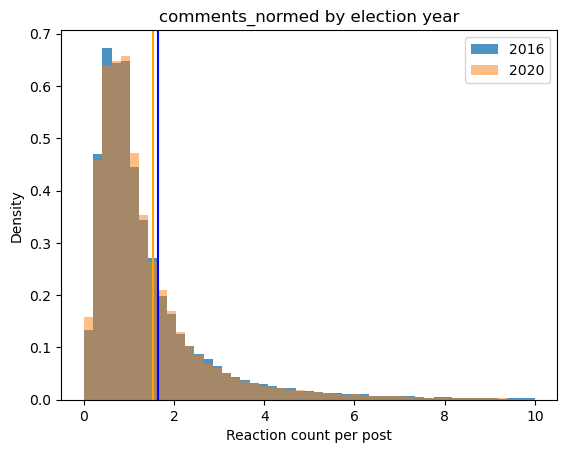

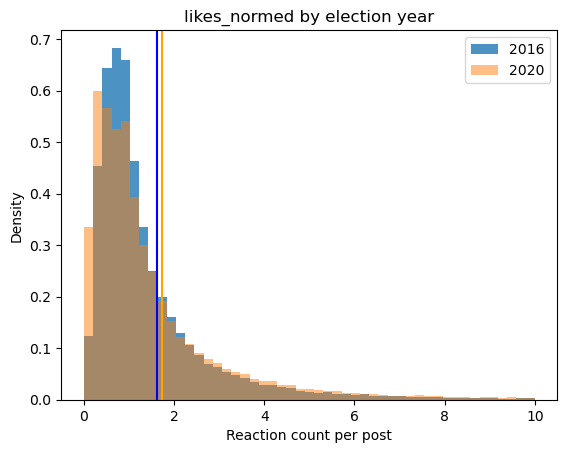

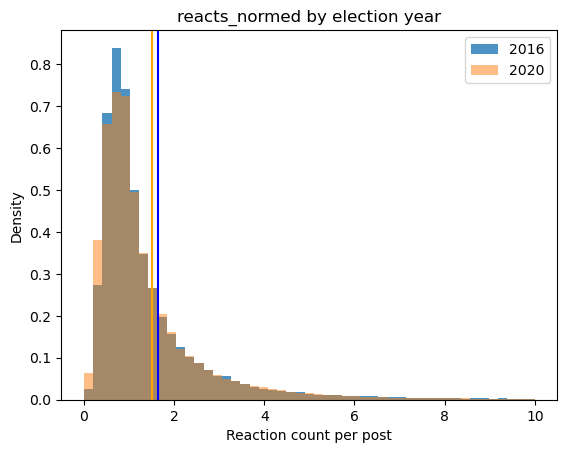

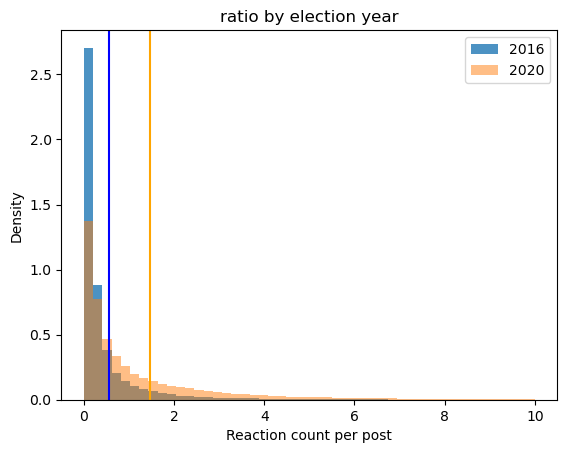

In [173]:
bins = np.linspace(0, 10, 50)

df1 = info_16[info_16['user_id'].isin(users_16_thr)]
df2 = info_20[info_20['user_id'].isin(users_20_thr)]

for col in ['comments_normed', 'likes_normed', 'reacts_normed', 'ratio']:

    plt.hist(df1[col], bins, density=True, alpha=0.8, label='2016')
    plt.axvline(x=df1[col].mean(), color='blue')
    
    plt.hist(df2[col], bins, density=True, alpha=0.5, label='2020')
    plt.axvline(x=df2[col].mean(), color='orange')
    
    plt.title(f"{col} by election year")
    plt.ylabel("Density")
    plt.xlabel("Reaction count per post")
    plt.legend(loc='upper right')
    plt.show()

In [106]:
df1[col].median()

29.747880062112618

### Non-CDS posts

In [189]:
info_all_2016 = pd.read_csv(data_fldr + "FB_info_no_ngram_2016.csv")
info_all_2020 = pd.read_csv(data_fldr + "FB_info_no_ngram_2020.csv")

In [191]:
factors_all_2016 = pd.DataFrame(info_all_2016.groupby('user_id').median())
factors_all_2020 = pd.DataFrame(info_all_2020.groupby('user_id').median())

In [195]:
info_all_2016['likes_normed'] = info_all_2016['likeCount'] / info_all_2016['user_id'].apply(lambda x:factors_all_2016['likeCount'].loc[x])
info_all_2016['comments_normed'] = info_all_2016['commentCount'] / info_all_2016['user_id'].apply(lambda x:factors_all_2016['commentCount'].loc[x])

info_all_2016['ratio'] = info_all_2016['commentCount']/(info_all_2016['likeCount']+1)

adjusted_all_2016 = users_16.set_index('user_id').merge(pd.DataFrame(info_all_2016.groupby('user_id').sum()[['likeCount', 'shareCount', 'commentCount']]), left_index=True, right_index=True)


In [197]:
info_all_2020['likes_normed'] = info_all_2020['likeCount'] / info_all_2020['user_id'].apply(lambda x:factors_all_2020['likeCount'].loc[x])
info_all_2020['comments_normed'] = info_all_2020['commentCount'] / info_all_2020['user_id'].apply(lambda x:factors_all_2020['commentCount'].loc[x])

info_all_2020['ratio'] = info_all_2020['commentCount']/(info_all_2020['likeCount']+1)

adjusted_all_2020 = users_20.set_index('user_id').merge(pd.DataFrame(info_all_2020.groupby('user_id').sum()[['likeCount', 'shareCount', 'commentCount']]), left_index=True, right_index=True)


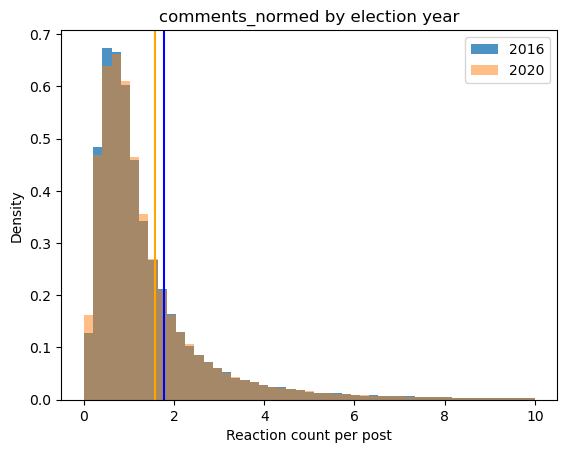

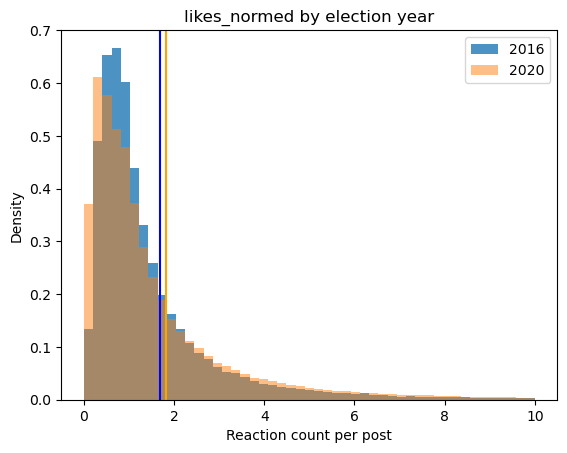

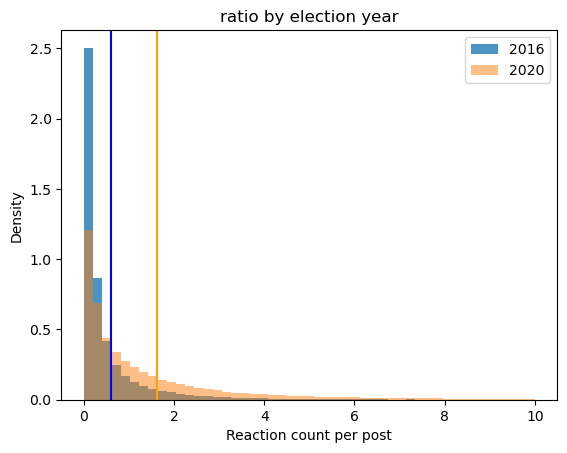

In [199]:
bins = np.linspace(0, 10, 50)

df1 = info_all_2016[info_all_2016['user_id'].isin(users_16_thr)]
df2 = info_all_2020[info_all_2020['user_id'].isin(users_20_thr)]

for col in ['comments_normed', 'likes_normed', 'ratio']:

    plt.hist(df1[col], bins, density=True, alpha=0.8, label='2016')
    plt.axvline(x=df1[col].mean(), color='blue')
    
    plt.hist(df2[col], bins, density=True, alpha=0.5, label='2020')
    plt.axvline(x=df2[col].mean(), color='orange')
    
    plt.title(f"{col} by election year")
    plt.ylabel("Density")
    plt.xlabel("Reaction count per post")
    plt.legend(loc='upper right')
    plt.show()

### Alternate Normalizations

In [204]:
alt_users_16 = list(set(info_16['user_id']).intersection(set(info_all_2016['user_id'])))
alt_users_20 = list(set(info_20['user_id']).intersection(set(info_all_2020['user_id'])))

In [211]:
alt_16 = info_16[info_16.user_id.isin(alt_users_16)]
alt_20 = info_20[info_20.user_id.isin(alt_users_20)]

alt_16['comments_normed'] = alt_16['commentCount'] / alt_16['user_id'].apply(lambda x:factors_all_2016['commentCount'].loc[x])
alt_20['comments_normed'] = alt_20['commentCount'] / alt_20['user_id'].apply(lambda x:factors_all_2020['commentCount'].loc[x])

alt_16['likes_normed'] = alt_16['likeCount'] / alt_16['user_id'].apply(lambda x:factors_all_2016['likeCount'].loc[x])
alt_20['likes_normed'] = alt_20['likeCount'] / alt_20['user_id'].apply(lambda x:factors_all_2020['likeCount'].loc[x])


/tmp/ipykernel_3863588/4087219372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alt_16['comments_normed'] = alt_16['commentCount'] / alt_16['user_id'].apply(lambda x:factors_all_2016['commentCount'].loc[x])
/tmp/ipykernel_3863588/4087219372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alt_20['comments_normed'] = alt_20['commentCount'] / alt_20['user_id'].apply(lambda x:factors_all_2020['commentCount'].loc[x])
/tmp/ipykernel_3863588/4087219372.py:7: SettingWithCopyWarning: 
A value is trying to 

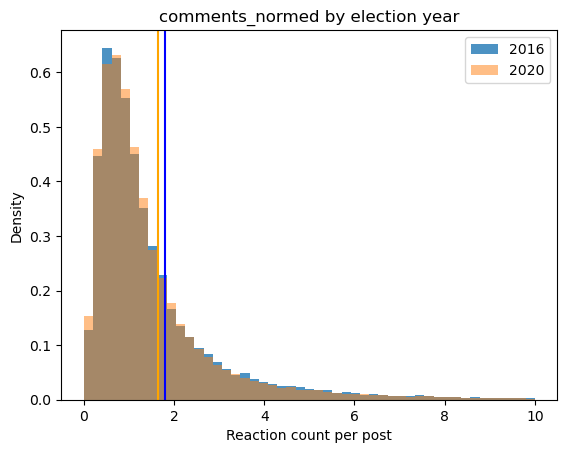

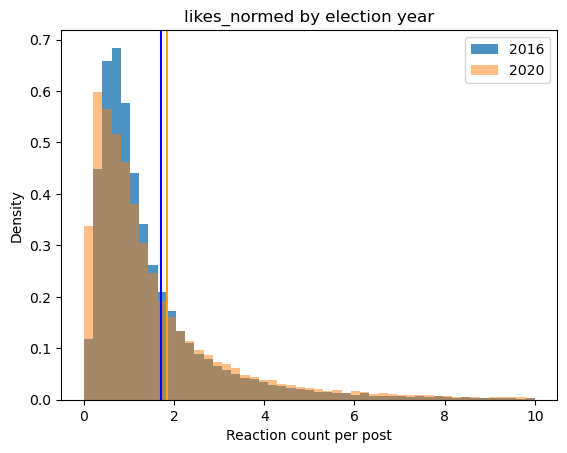

In [212]:
bins = np.linspace(0, 10, 50)

df1 = alt_16[alt_16['user_id'].isin(users_16_thr)]
df2 = alt_20[alt_20['user_id'].isin(users_20_thr)]

for col in ['comments_normed', 'likes_normed']:

    plt.hist(df1[col], bins, density=True, alpha=0.8, label='2016')
    plt.axvline(x=df1[col].mean(), color='blue')
    
    plt.hist(df2[col], bins, density=True, alpha=0.5, label='2020')
    plt.axvline(x=df2[col].mean(), color='orange')
    
    plt.title(f"{col} by election year")
    plt.ylabel("Density")
    plt.xlabel("Reaction count per post")
    plt.legend(loc='upper right')
    plt.show()